In [2]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 163.8 kB/s eta 0:12:43
   ---------------------------------------- 0.0/124.9 MB 163.8 kB/s eta 0:12:43
   ---------------------------------------- 0.1/124.9 MB 233.8 kB/s eta 0:08:55
   ---------------------------------------- 0.1/124.9 MB 327.7 kB/s eta 0:06:21
   ---------------------------------------- 0.2/124.9 MB 482.7 kB/s eta 0:04:19
   -------------------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Importing the dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


2. Importing the Boston House Price Dataset

In [20]:
house_price_dataset = pd.read_csv(r"D:\OneDrive - GroupM Bangladesh\Machine Learning Projects\Siddhardhan\3. House Price Prediction\boston_house_prices.csv")
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
#checking the number of rows and columns in dataframe
house_price_dataset.shape

(506, 14)

In [24]:
#checking if there is any missing values
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [25]:
#statistical measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


3. Understanding the correlation between the features in dataset

In [26]:
correlation = house_price_dataset.corr()

<Axes: >

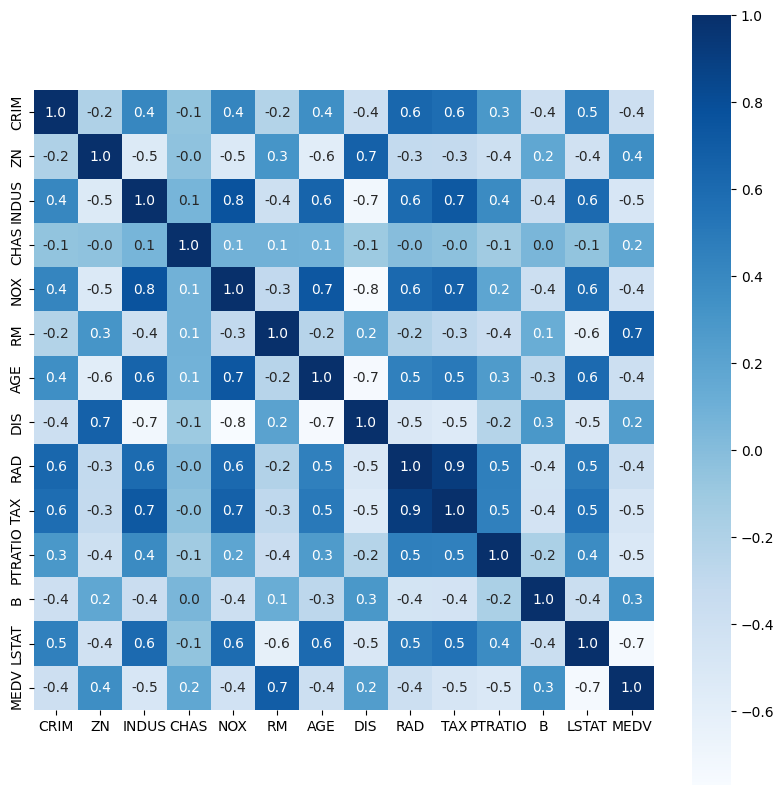

In [32]:
#constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt = ".1f", annot = True, annot_kws={'size':10},cmap="Blues")

4. Splitting the Independent Variables (Features) and Target


In [35]:
X = house_price_dataset.drop(columns='MEDV',axis=1)
y = house_price_dataset['MEDV']

In [36]:
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

5. Splitting Training and Test Data

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
#How many instances in training and testing variables

print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


6. Model Training

In [42]:
#loading the model
model = XGBRegressor()

In [43]:
#training the model with X_train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

7. Prediction on Training Data

In [44]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[11.990929  19.915493  19.392988  13.408072  18.19098   24.603947
 21.08647   24.697266   8.70618   27.501347  20.708258  36.17404
 31.59529   11.69739   39.802494  13.893334  21.796898  23.695662
 17.590319  24.409176   8.799549  19.181791  25.278059  20.410582
 23.10783   37.90089   15.601625  45.400623  15.706774  22.599428
 14.514692  18.697655  17.797323  16.117708  20.609972  31.598558
 29.095152  15.600668  17.563873  22.51095   19.401443  19.287243
  8.4968405 20.607521  17.006351  17.093975  14.495169  49.98619
 14.284735  12.609954  28.688086  21.203852  19.306932  23.089056
 19.10372   25.004898  33.408142   4.992768  29.599434  18.685545
 21.707012  23.096918  22.802471  20.991085  48.796387  14.627051
 16.613852  27.075224  20.087227  19.794464  20.992268  41.290615
 23.175125  20.378569  18.558722  29.399414  36.40198   24.388987
 11.816533  13.792832  12.272116  17.794773  33.087368  26.73878
 13.393904  14.386449  50.004574  21.98985   19.906004  23.784376
 17.516703  1

8. Checking the Accuracy for Training Data

In [47]:
# R Squared Error
score_1 = metrics.r2_score(y_train,training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print(score_1)
print(score_2)

0.9999969829984965
0.011182523717974735


9. Prediction on Test Data


In [48]:
test_data_prediction = model.predict(X_test)

10. Checking the Accuracy for Test Data

In [49]:
score_1_test = metrics.r2_score(y_test,test_data_prediction)
score_2_test = metrics.mean_absolute_error(y_test,test_data_prediction)

print(score_1_test,score_2_test)

0.9057837838492537 1.8908873698290656


11. Creating a predictive system

In [54]:
input_data = np.array([[0.7842,0,8.14,0,0.538,5.99,81.7,4.2579,4,307,21,386.75,14.67]])

prediction_of_house_price = model.predict(input_data)

prediction_of_house_price

array([17.563873], dtype=float32)